In [ ]:
!pip install openpyxl
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
df = pd.read_excel("/content/ddp_master_ data.xlsx")
df = df.sort_values(by='Date')
df['Date'] = df['Date'].dt.to_period('M').dt.to_timestamp()
df = df.set_index('Date')
df = df.asfreq('MS')

In [ ]:
df.info()
df.describe().T
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 1991-01-01 to 2024-12-01
Freq: MS
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   US TBill 10Y Yield(%)                   408 non-null    float64
 1   Rolling Volatility (1 Year)             396 non-null    float64
 2   Fed Funds Rate (%)                      408 non-null    float64
 3   PCE(Monthly % change)                   408 non-null    float64
 4   ISM Manufacturing Index                 408 non-null    float64
 5   Non Farm Payroll ('000s jobs/month)     408 non-null    int64  
 6   Building permits(in thousands)          408 non-null    int64  
 7   S&P 500(CONVERT TO PERCENT)             408 non-null    float64
 8   German Bund Yield                       408 non-null    float64
 9   USD Index                               408 non-null    float64
 10  Consumer Sentiment Index          

,0
US TBill 10Y Yield(%),0
Rolling Volatility (1 Year),12
Fed Funds Rate (%),0
PCE(Monthly % change),0
ISM Manufacturing Index,0
Non Farm Payroll ('000s jobs/month),0
Building permits(in thousands),0
S&P 500(CONVERT TO PERCENT),0
German Bund Yield,0
USD Index,0


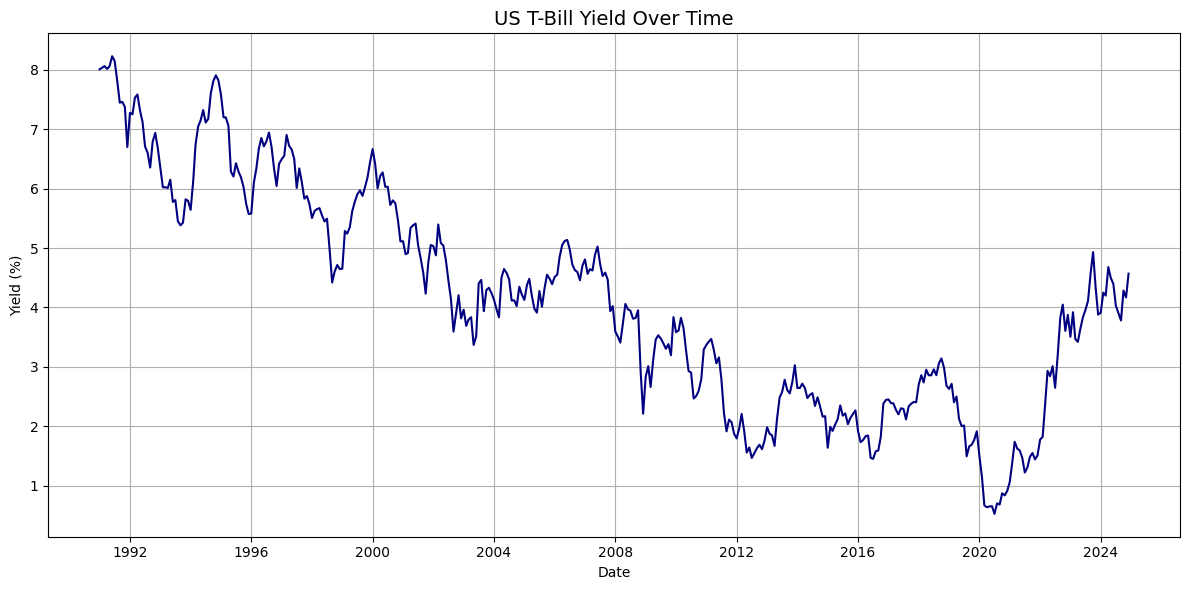

In [ ]:
import matplotlib.pyplot as plt

# Plotting the T-Bill Yield over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['US 10 Year TBill 10Y Yield(%)'], linestyle='-', color='navy')
plt.title('US T-Bill Yield Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

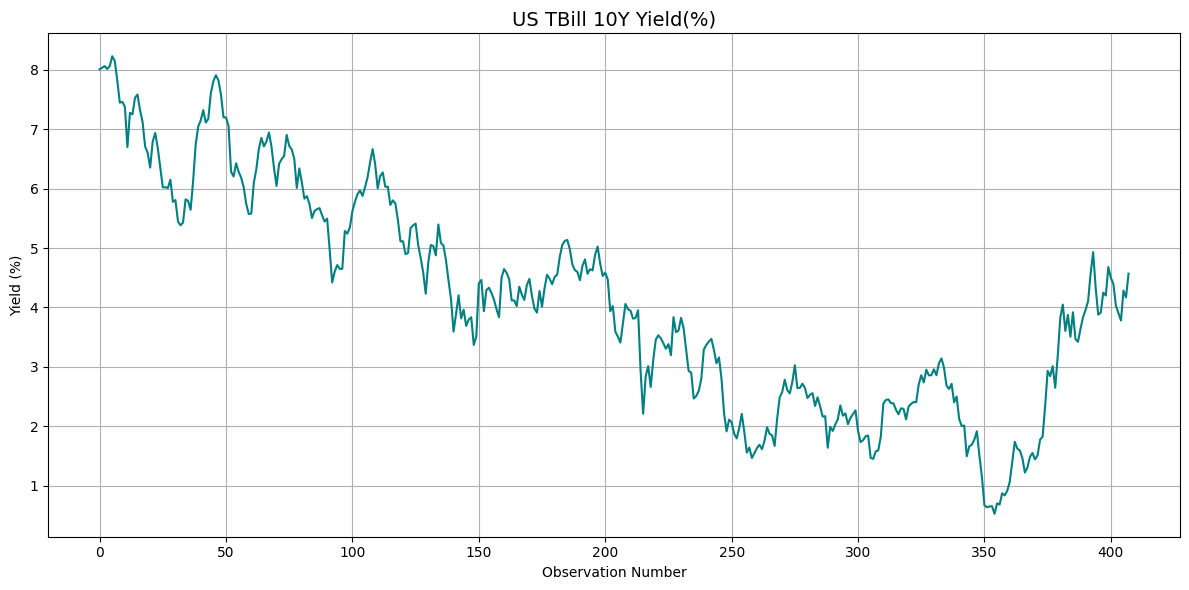

In [ ]:
import matplotlib.pyplot as plt

# Reset index to use observation number
tbill_values = df['US TBill 10Y Yield(%)'].reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(tbill_values, linestyle='-', color='teal')
plt.title('US TBill 10Y Yield(%)', fontsize=14)
plt.xlabel('Observation Number')
plt.ylabel('Yield (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns = 'Rolling Volatility (1 Year)',inplace=True)

In [ ]:
df.info()
df.describe().T
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 1991-01-01 to 2024-12-01
Freq: MS
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   US TBill 10Y Yield(%)                   408 non-null    float64
 1   Fed Funds Rate (%)                      408 non-null    float64
 2   PCE(Monthly % change)                   408 non-null    float64
 3   ISM Manufacturing Index                 408 non-null    float64
 4   Non Farm Payroll ('000s jobs/month)     408 non-null    int64  
 5   Building permits(in thousands)          408 non-null    int64  
 6   S&P 500(CONVERT TO PERCENT)             408 non-null    float64
 7   German Bund Yield                       408 non-null    float64
 8   USD Index                               408 non-null    float64
 9   Consumer Sentiment Index                408 non-null    float64
 10  Debt to GDP                       

,0
US TBill 10Y Yield(%),0
Fed Funds Rate (%),0
PCE(Monthly % change),0
ISM Manufacturing Index,0
Non Farm Payroll ('000s jobs/month),0
Building permits(in thousands),0
S&P 500(CONVERT TO PERCENT),0
German Bund Yield,0
USD Index,0
Consumer Sentiment Index,0


In [ ]:
df.head()

,US TBill 10Y Yield(%),Fed Funds Rate (%),PCE(Monthly % change),ISM Manufacturing Index,Non Farm Payroll ('000s jobs/month),Building permits(in thousands),S&P 500(CONVERT TO PERCENT),German Bund Yield,USD Index,Consumer Sentiment Index,Debt to GDP,Unemployment Rate(%),Crude Oil Front Month Future (USD/bbl),Industrial Production Index
Date,,,,,,,,,,,,,,
1991-01-01,8.007,6.91,0.104342,39.2,-110,786,343.93,8.615,82.00,66.8,-4.026,6.4,21.54,61.0842
1991-02-01,8.033,6.25,0.050673,39.4,-323,853,367.07,8.329,84.07,70.4,-3.877,6.6,19.16,60.6387
1991-03-01,8.061,6.12,0.021239,40.7,-167,911,375.22,8.484,92.01,87.7,-3.675,6.8,19.63,60.2973
1991-04-01,8.013,5.91,0.181310,42.8,-218,916,375.35,8.341,91.54,81.8,-3.813,6.7,20.96,60.4524
1991-05-01,8.059,5.78,0.414139,44.5,-97,991,389.83,8.266,93.15,78.3,-3.991,6.9,21.13,61.0587


In [ ]:
df.tail()

,US TBill 10Y Yield(%),Fed Funds Rate (%),PCE(Monthly % change),ISM Manufacturing Index,Non Farm Payroll ('000s jobs/month),Building permits(in thousands),S&P 500(CONVERT TO PERCENT),German Bund Yield,USD Index,Consumer Sentiment Index,Debt to GDP,Unemployment Rate(%),Crude Oil Front Month Future (USD/bbl),Industrial Production Index
Date,,,,,,,,,,,,,,
2024-08-01,3.9034,5.33,0.123002,47.5,71,1470,5648.40,2.299,101.698,67.9,-7.044,4.2,73.55,103.0196
2024-09-01,3.7809,5.13,0.171345,47.5,240,1425,5762.48,2.123,100.779,70.1,-6.244,4.1,68.17,102.5954
2024-10-01,4.2844,4.83,0.263033,46.9,44,1419,5705.45,2.390,103.976,70.5,-6.894,4.1,69.26,102.2669
2024-11-01,4.1685,4.64,0.107834,48.4,261,1493,6032.38,2.088,105.737,71.8,-7.072,4.2,68.00,102.0231
2024-12-01,4.5690,4.48,0.297430,49.2,323,1482,5881.63,2.367,108.487,74.0,-6.922,4.1,71.72,103.1654


### Univariate Analysis

# Multivariate Analysis

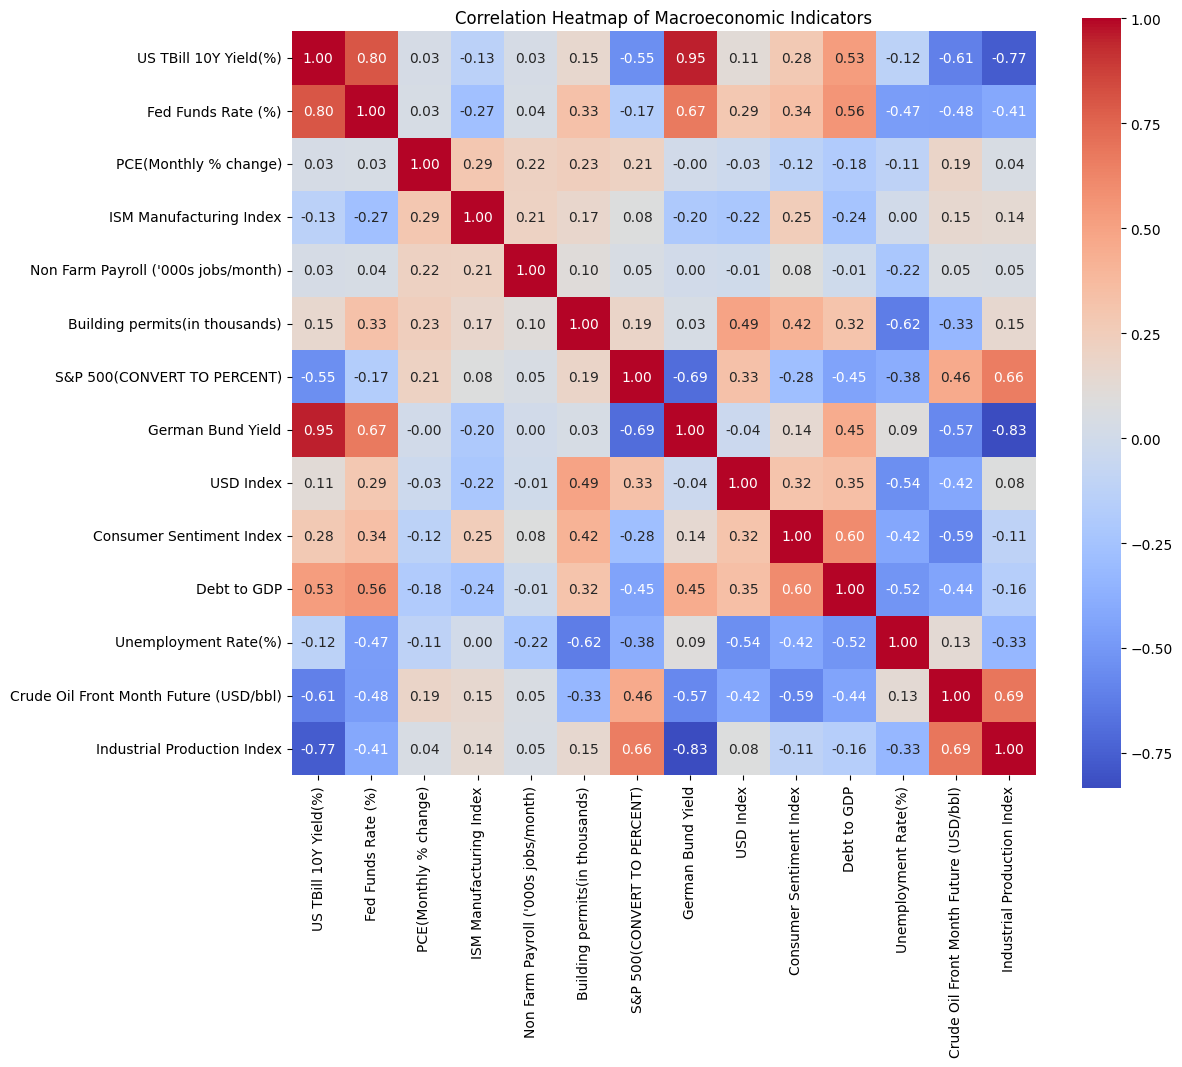

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Macroeconomic Indicators")
plt.show()

In [ ]:
X = df.dropna().copy()

# Add constant for VIF calculation
X_vif = add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                                   Feature          VIF
0                                    const  1229.077121
1                    US TBill 10Y Yield(%)    42.324576
2                       Fed Funds Rate (%)     8.197838
3                    PCE(Monthly % change)     1.508835
4                  ISM Manufacturing Index     3.152653
5      Non Farm Payroll ('000s jobs/month)     1.281280
6           Building permits(in thousands)     3.182807
7              S&P 500(CONVERT TO PERCENT)    12.115787
8                        German Bund Yield    43.424342
9                                USD Index     3.922935
10                Consumer Sentiment Index     6.043679
11                             Debt to GDP     9.348270
12                    Unemployment Rate(%)     7.112979
13  Crude Oil Front Month Future (USD/bbl)    11.072438
14             Industrial Production Index    14.580664


### Feature Engineering

1. S&P 500 to Percentage Change

In [ ]:
df['S&P 500(%)'] = df['S&P 500(CONVERT TO PERCENT)'].pct_change() * 100
df = df.drop(columns=['S&P 500(CONVERT TO PERCENT)'])
df['S&P 500(%)'] = df['S&P 500(%)'].fillna(0)
print(df[['S&P 500(%)']].head())

            S&P 500(%)
Date                  
1991-01-01    0.000000
1991-02-01    6.728113
1991-03-01    2.220285
1991-04-01    0.034646
1991-05-01    3.857733


2. German Bond Yield Differencing

3. Feature Interactions:

*   Economic_Stress = Unemployment_Rate * Industrial_Production

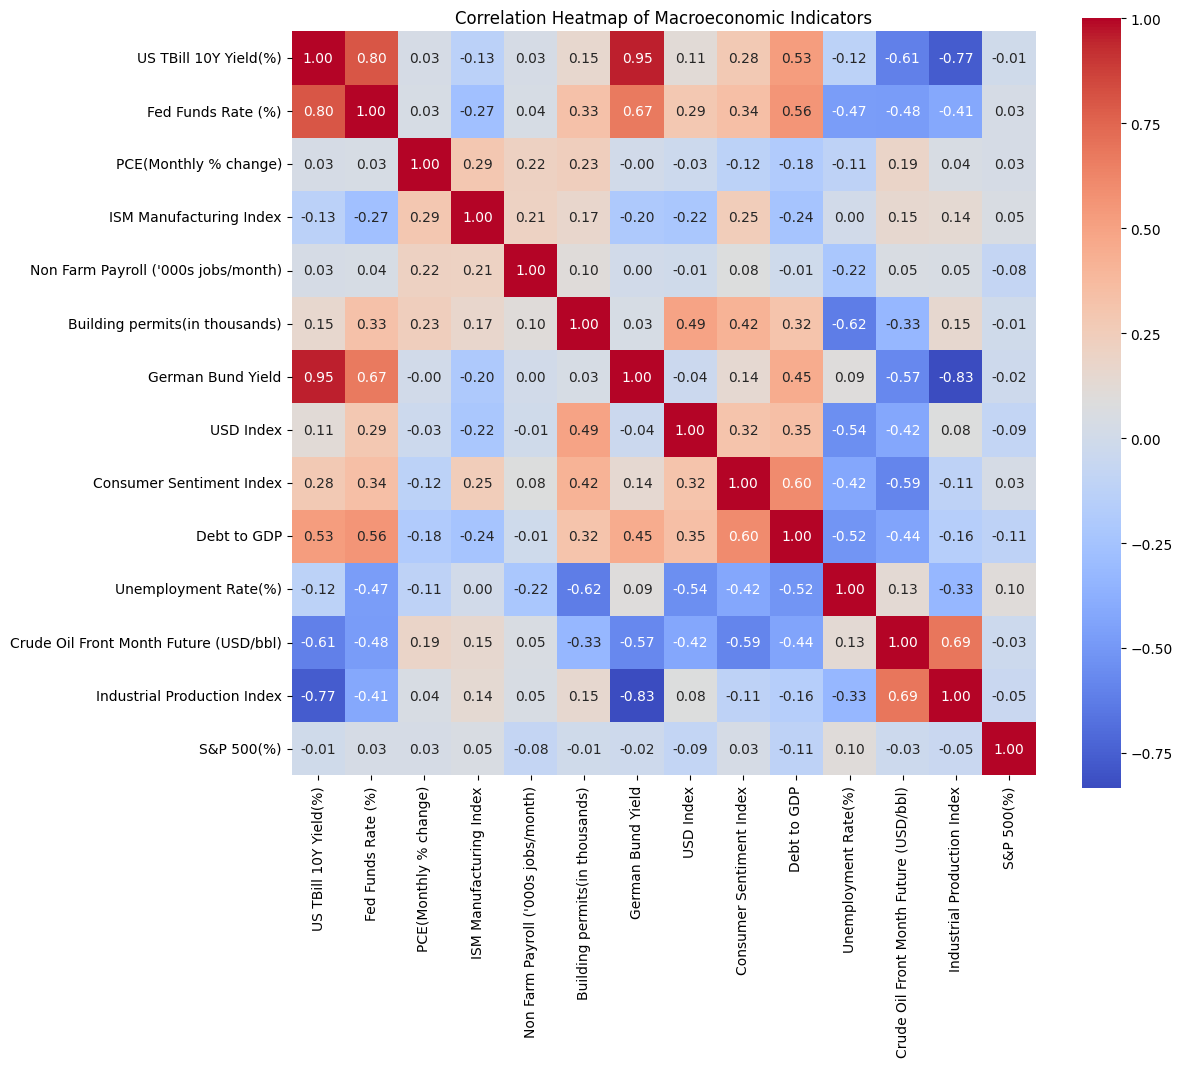

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Macroeconomic Indicators")
plt.show()

In [ ]:
print(df.columns.tolist())

['US TBill 10Y Yield(%)', 'Fed Funds Rate (%)', 'PCE(Monthly % change)', 'ISM Manufacturing Index', "Non Farm Payroll ('000s jobs/month)", 'Building permits(in thousands)', 'German Bund Yield', 'USD Index', 'Consumer Sentiment Index', 'Debt to GDP', 'Unemployment Rate(%)', 'Crude Oil Front Month Future (USD/bbl)', 'Industrial Production Index', 'S&P 500(%)']


In [ ]:
df.drop(columns=["PCE(Monthly % change)","ISM Manufacturing Index","Non Farm Payroll ('000s jobs/month)",'USD Index'],inplace=True)

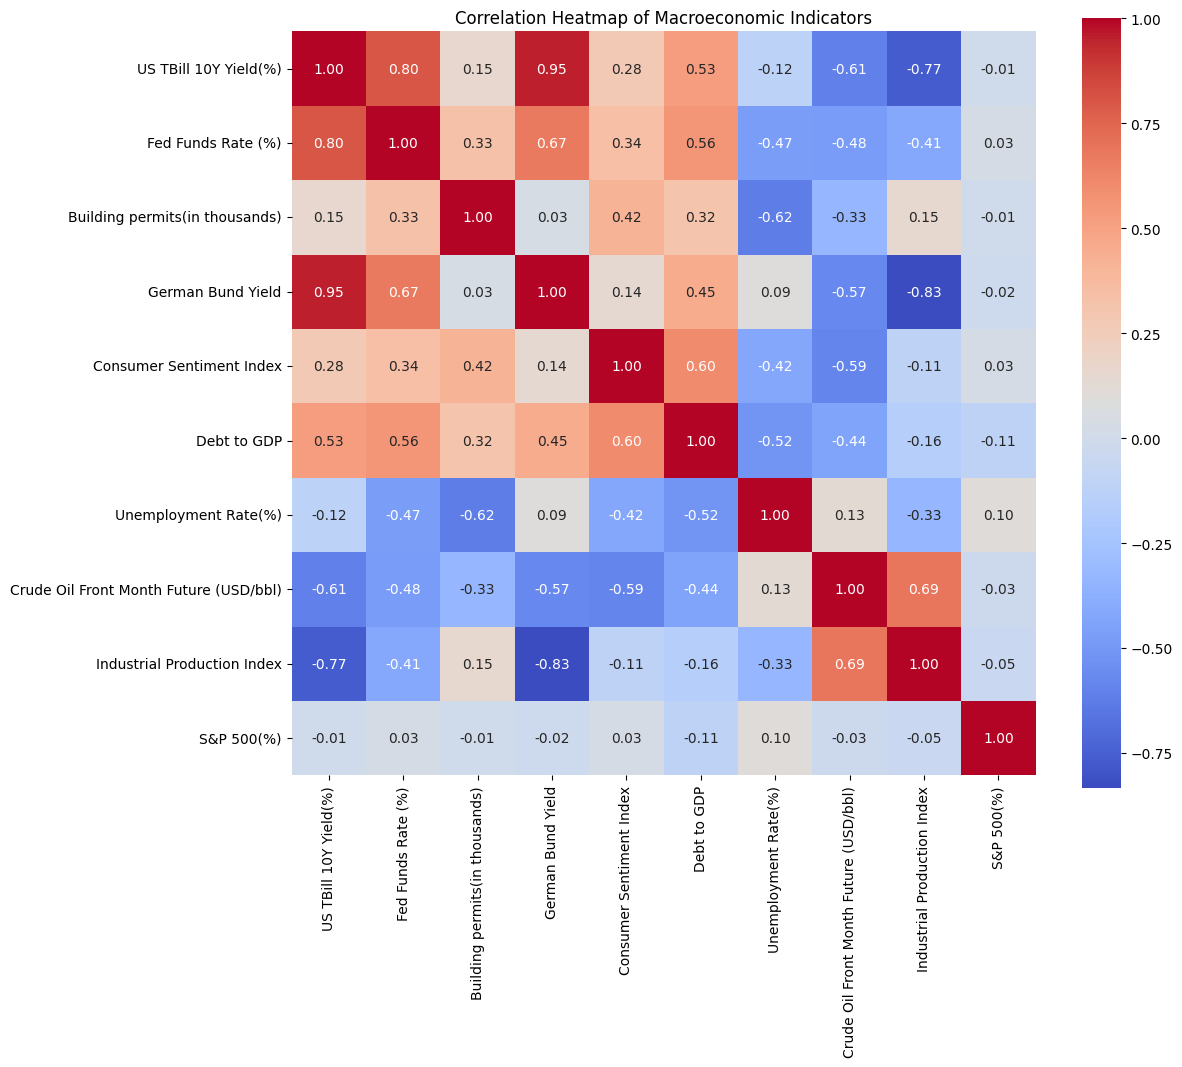

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Macroeconomic Indicators")
plt.show()

In [ ]:
df['Economic_Stress'] = df['Unemployment Rate(%)'] * df['Industrial Production Index']

In [ ]:
df.drop(columns=['Unemployment Rate(%)','Industrial Production Index'],inplace=True)

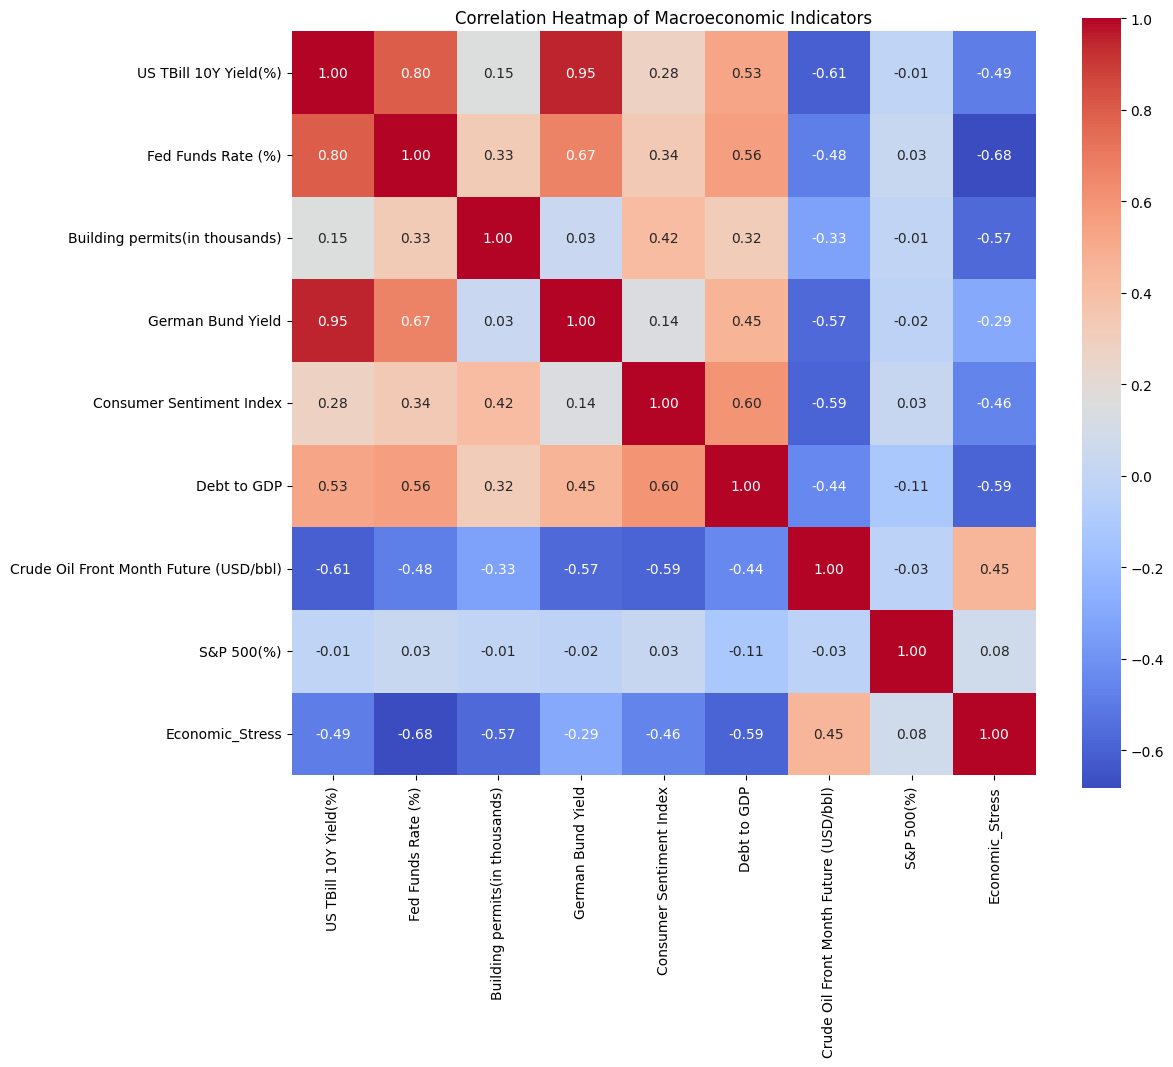

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Macroeconomic Indicators")
plt.show()

In [ ]:
target_col = 'US TBill 10Y Yield(%)'

# Get feature columns (excluding the target)
feature_cols = df.columns[df.columns != target_col]

# Create shifted DataFrame with renamed columns
shifted_df = df[feature_cols].shift(1)
shifted_df.columns = [f'{col}_shifted(1M)' for col in feature_cols]

# Concatenate the shifted features with the original target
df_final = pd.concat([ df[[target_col]], shifted_df,], axis=1)

# Drop rows with NaNs (first row will have NaNs due to shifting)
df_final.dropna(inplace=True)

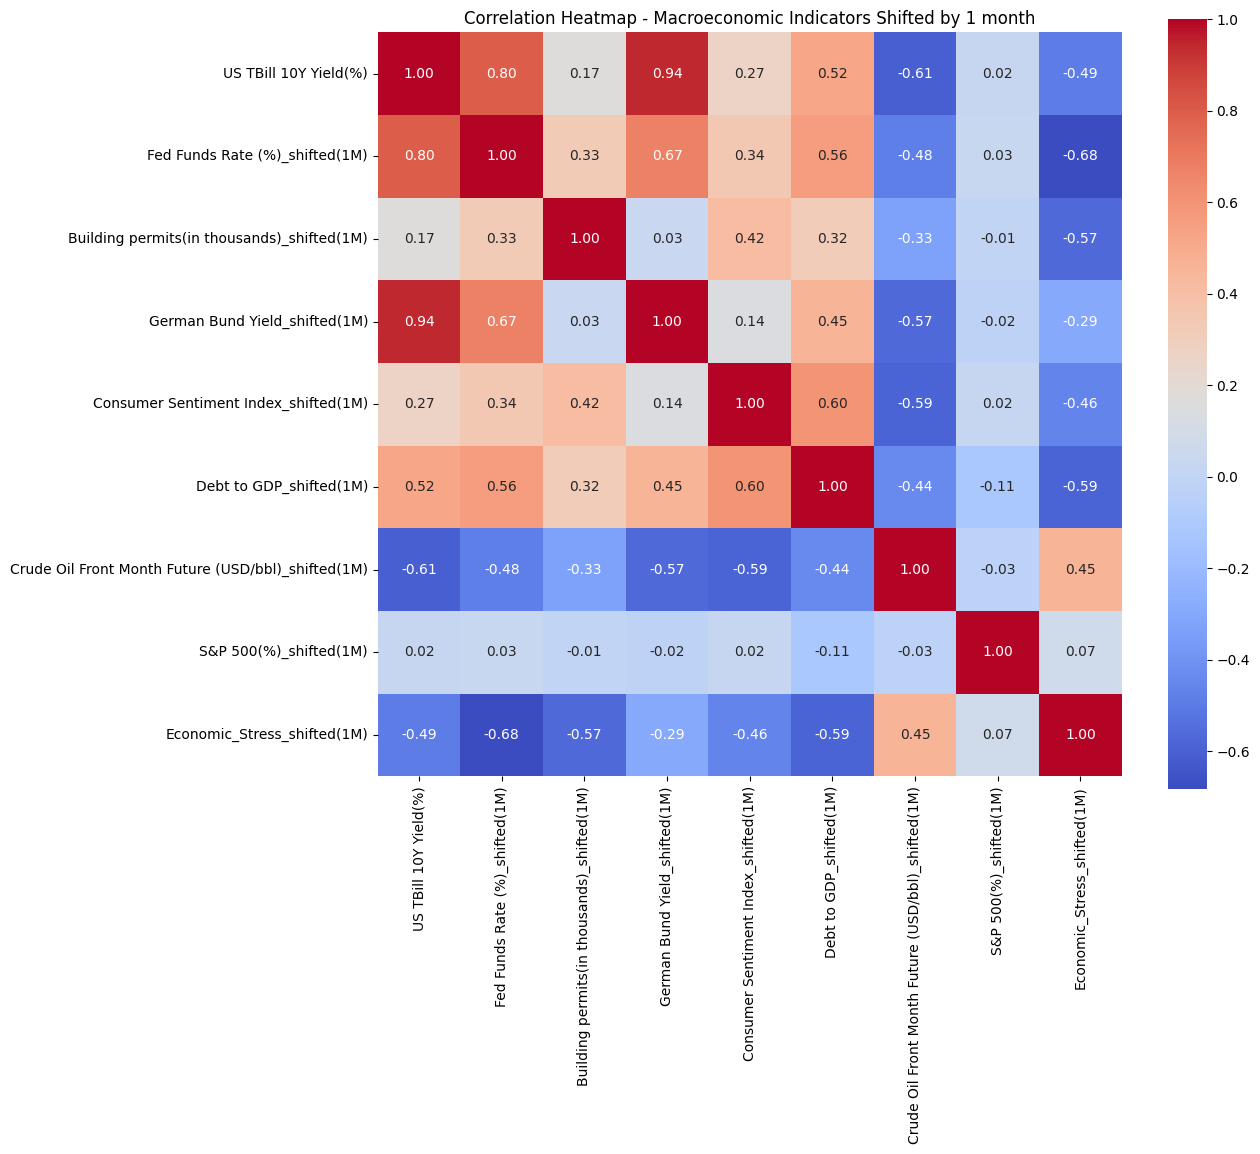

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap - Macroeconomic Indicators Shifted by 1 month")
plt.show()